<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60">

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'>


Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej".   
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

# Statistical machine learning - Notebook 10, version for students
**Author: Jacek Sroka and Michał Ciach**  


## Description


With this notebook, you will learn how to use *tree models* and *ensemble methods* like *bagging* and *boosting*.

## Data & library imports

In [ ]:
!pip install -U scikit-learn
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
from matplotlib import pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


## Tree models
Tree models can be used both for classification and regregression. By themselves, they usually aren't very effective but are explainable and can be improved with ensemble methods like bagging and boosting.

In contrast to regression models (linear and logistic regression) and Linear Discriminant Analysis, tree models are *non-parametric*, i.e. they do not assume any structure of the model, but infer it from the data. This is both an advantage and a disadvantage. What is more, tree-based methods can be good for problems with non-linear boundaries especially when data is ordinal or categorical (note that not all library implementations support categorical data).

We will start by applying decision trees to classify breast cancer as either benign or malignant based on data from biopsies, where a sample of a tumor is analyzed under a microscope and described by a medical professional.

### Exercise 0.
Download the breast cancer biopsy data from [this link](https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Breast%20Cancer%20Wisconsin). Based on the description in `README.md`, figure out what are the possible classes, how they are encoded, and which columns should be used for classification. Is this data suitable for logistic regression? Why/why not?

Load the data into a Pandas data frame. Use the `column_names` listed below to assign column names to the data frame. Check if the data requires pre-processing and, if yes, do it. You may want to inspect the `df.dtypes` attribute of a dataframe and use the [unique()](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) method to print all different values from a given column.

Split the data set into two variables: a data frame `X` with independent variables, i.e. the columns that you will use as predictors, and a vector `y` with the dependent variable, i.e. the cancer class label. Split both data frames into training and testing data sets using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from the `sklearn` package, so that the test data set has 1/3 of all observations and the training data set has the rest.

In [ ]:
column_names = ["Sample code number",
                "Clump Thickness",
                "Uniformity of Cell Size",
                "Uniformity of Cell Shape",
                "Marginal Adhesion",
                "Single Epithelial Cell Size",
                "Bare Nuclei",
                "Bland Chromatin",
                "Normal Nucleoli",
                "Mitoses",
                "Class"]

In [ ]:
# Put your code here


--2024-04-27 14:29:16--  https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Breast%20Cancer%20Wisconsin/breast-cancer-wisconsin.csv
Resolving code.datasciencedojo.com (code.datasciencedojo.com)... 172.66.43.64, 172.66.40.192, 2606:4700:3108::ac42:2b40, ...
Connecting to code.datasciencedojo.com (code.datasciencedojo.com)|172.66.43.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19889 (19K) [text/plain]
Saving to: ‘breast-cancer-wisconsin.csv’

breast-cancer-wisco 100%[===================>]  19.42K  --.-KB/s    in 0s      

2024-04-27 14:29:16 (104 MB/s) - ‘breast-cancer-wisconsin.csv’ saved [19889/19889]

Benign count= 5038
Malignant count= 2651


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
# Put your code here


Column data types:
Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

Sample code number: [ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  111390

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
# Put your code here


Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


## The CART algorithm

Before moving to random forests, we will learn how to use single trees for classification. We will focus on an algorithm called Classification and Regression Trees (CART).  

The main advantages of using a single decision tree are that it is highly explainable (we know exactly how classification is performed) and computationally effective. In particular, they allow for a very fast classification of new observations, which has a crucial importance e.g. in online trading or real-time bidding.  

However, decision trees are prone to overfitting, and may not be very accurate. If grown deep and not pruned, they have low bias but high variance. This means that there are not many assumptions about the data, e.g., that it was generated from a linear model or some distribution, but the structure of the tree is rather unstable - small perturbations in the data set can introduce large changes to the tree.

## Exercise 1
Fit a CART model to the training data set using the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) function from `sklearn` with default options. Check the training and test errors. Is the test error satisfactory? Do the errors change between runs? If so, read the documentation to figure out why.

Visualize the tree using the [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) or [export_text](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html) function from `sklearn`. Is it easy to interpret? How many features need to be evaluated to classify the tumor? Would such a classification procedure be useful for medical professionals in daily clinical practice?

Limit the complexity of the tree by setting the `max_depth` parameter to the value of your choice and compare your results. Did it change the test accuracy? Is it more useful in practice? What features of a biopsy are most important for determining if the tumor is malignant?

Generate a confusion matrix for the classifier. Do you detect a bias in the results? What is the probability that, if a tumor is classified as benign, while it is in fact malignant, and the other way around? Is it good in this case?

Training accuracy: 1.0
Test accuracy: 0.9424778761061947
Confusion matrix:
[[139   5]
 [  8  74]]
FNR for benign: 0.034722222222222224
FNR for malignant: 0.0975609756097561
Training accuracy of a shallow tree: 0.975929978118162
Test accuracy of a shallow tree: 0.9424778761061947
Confusion matrix for the shallow classifier:
[[138   6]
 [  7  75]]


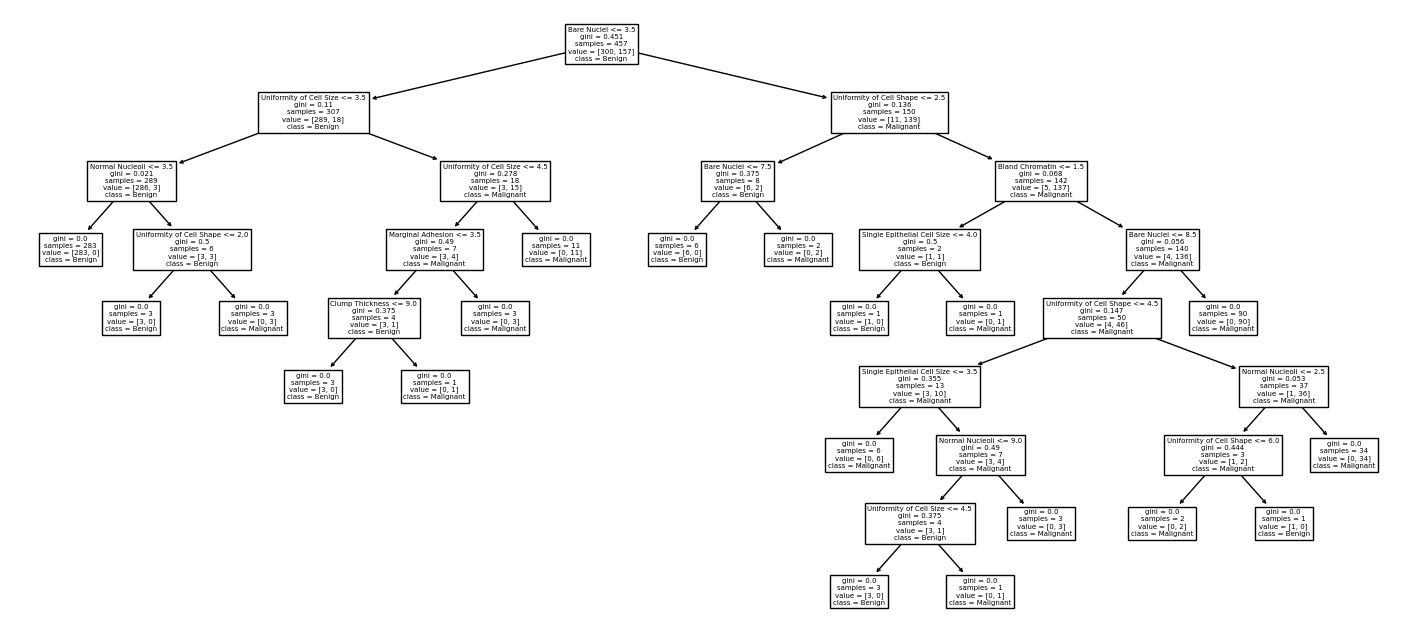

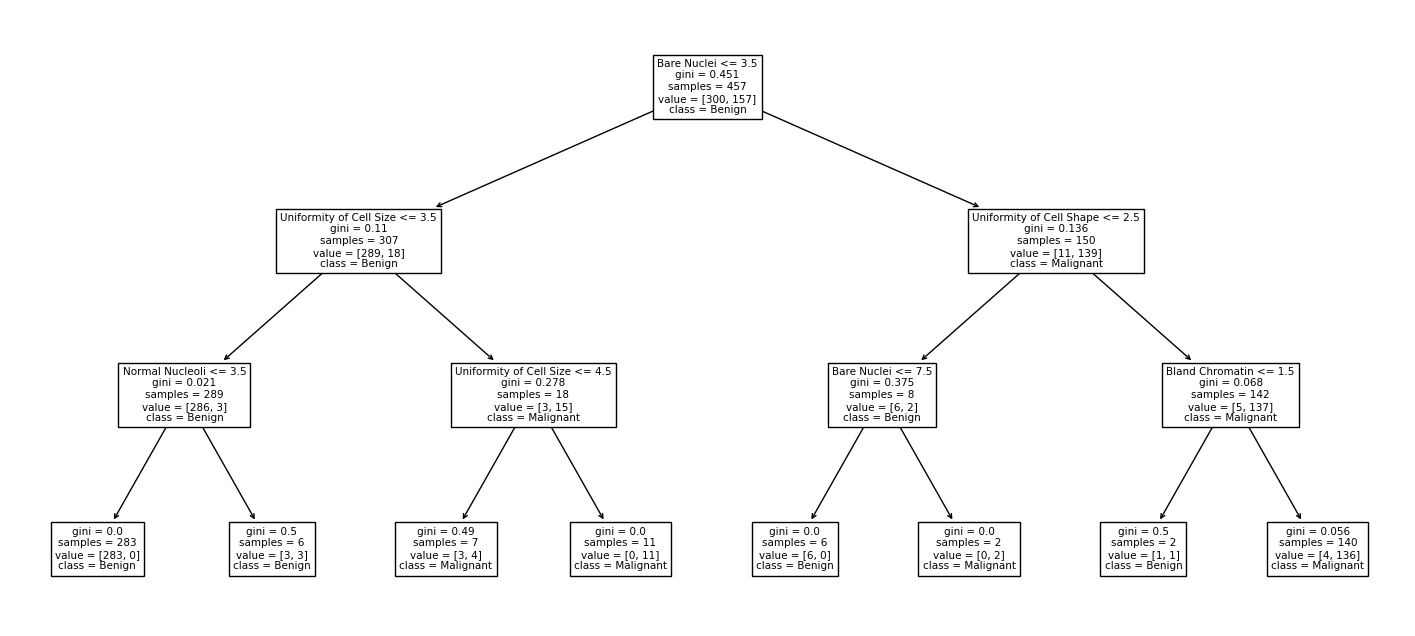

In [ ]:
# Put your code here


Note that decision tree learners create biased trees if some classes dominate, so it is recommended to balance the dataset prior to fitting with the decision tree. In our example, we ignored this step.

### Exercise 2
Look at the values in the tree. Do you understand what the values in the tree nodes in the visualization mean and how the tree is constructed and used for classification? How can a tree model be used for regression?

Hint: The classification and regression criteria are described in [mathematical formulation](https://scikit-learn.org/stable/modules/tree.html#tree-mathematical-formulation).

### Exercise 3
Follow this [tutorial](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html) and plot a similar graph for our examples.

Recall that decision trees are best suited for creating boundaries that are axis-aligned. Inspect the graphs and check where the boundaries are naturally axis-aligned and where they just approximate oblique boundaries.

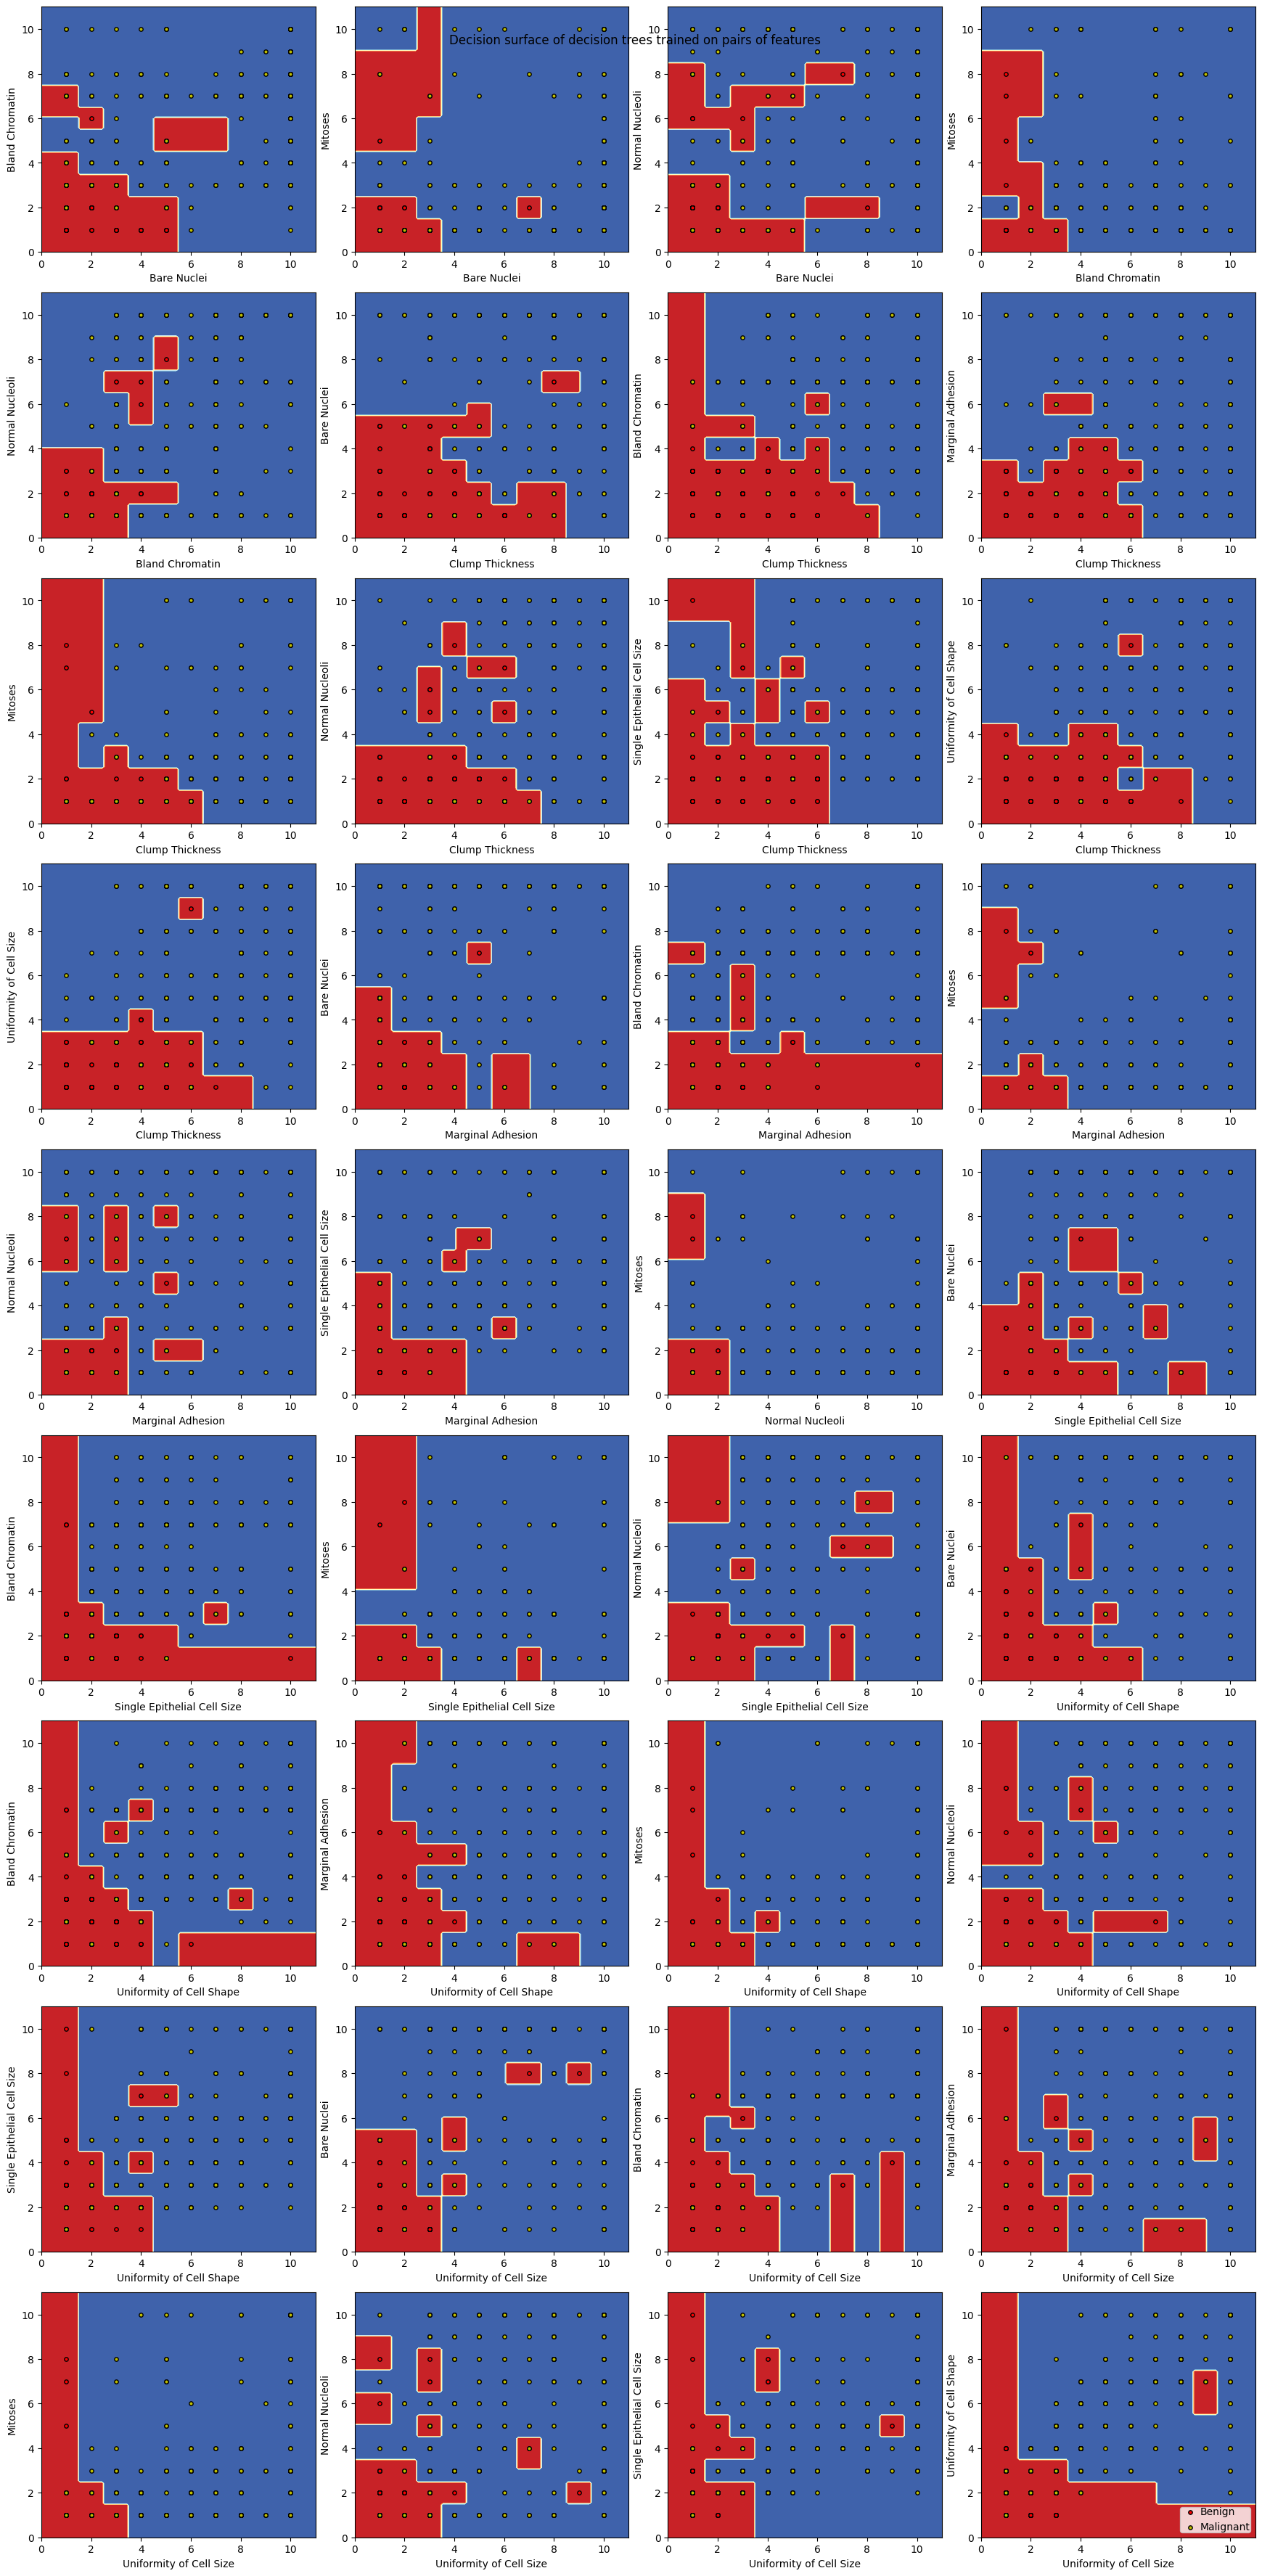

In [ ]:
# Put your code here


## Bagging and random forests
Tree models are very convenient to present *ensemble methods*. Those are techniques where multiple models are combined to produce improved results. We could mix various types of models, but we will combine multiple simple tree models and produce a model with a much smaller variance. Unfortunately, this will come at a cost of explainability.

The first ensemble method we introduce is *bagging*. In bagging we use bootstrap to generate many samples of data and on each, we train a separate simple tree model. Then, we average the results from all those models (or pick the most common one in case of classification) and get the resulting ensemble model with a smaller variance.

### Exercise 4
Use [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) (on `DecisionTreeClassifier`) to repeat the classification of our cancer dataset. Print training accuracy, test accuracy, confusion matrix, and FNR for both classes. Play with different settings of `n_estimators`, `max_samples` and `max_features` parameters. Note that using a large number of trees in a bag does not lead to overfitting.

In [ ]:
# Put your code here


Training accuracy: 0.9912472647702407
Test accuracy: 0.9601769911504425
Confusion matrix:
[[140   4]
 [  5  77]]
FNR for benign: 0.027777777777777776
FNR for malignant: 0.06097560975609756


### Random forests
Random forests improve uppon bagging, by making the trees less correlated. For that, each time a new tree is trained, it is only allowed to consider a random subsample of features. This further limits the risk of overfitting.

### Exercise 5
Fit a random forest to the training data set using the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) function from the `scikit` package. Check if this algorithm allows us to get a better classification accuracy on the test data set. What if you limit the maximum depth of trees?  

For each observation from the test set, predict the probability that the tumor is malignant. Plot the probabilities on a histogram (separately for both classes). Figure out an appropriate threshold so that if the probability is higher, the tumor is classified as malignant. Use this threshold to classify the observations and show the results using a confusion matrix.  

Obtain the importance of each variable (see the [documentation](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)). Visualize the importance on a horizontal bar plot. Is there a subset of variables that is the most important for prediction? Are there any variables that can be discarded without a significant loss in accuracy? Remove them, fit a random forest to the restricted data set, calculate a confusion matrix, and compare it to the random forest fitted to the whole data set. What if you remove variables of the highest importance?

**Note for the tutors.** A threshold of 0.2 probability allows us to get a nearly perfect recall on malignant tumors without a significant loss in accuracy. Hooray, several lives were saved without a significant cost to the hospital!

Apparently, if we remove highly important variables, nothing happens. Oh well, sometimes it's just like this.

In [ ]:
# Put your code here


Training accuracy: 1.0
Test accuracy: 0.9513274336283186
Confusion matrix:
[[140   4]
 [  7  75]]
Training accuracy (shallow): 0.9912472647702407
Test accuracy (shallow): 0.9557522123893806
Confusion matrix (shallow):
[[140   4]
 [  6  76]]


Confusion matrix for probability > 0.2:
[[137   7]
 [  1  81]]


Without ['Mitoses']
Training accuracy (>0.2): 1.0
Test accuracy (>0.2): 0.9601769911504425
Confusion matrix (>0.2):
[[140   4]
 [  5  77]]
Without ['Bare Nuclei', 'Uniformity of Cell Size', 'Uniformity of Cell Shape']
Training accuracy (>0.2): 1.0
Test accuracy (>0.2): 0.9513274336283186
Confusion matrix (>0.2):
[[139   5]
 [  6  76]]


## Boosting
Recall (for full explanation see Section 8.2.3 in the [book](https://drive.google.com/file/d/1ajFkHO6zjrdGNqhqW1jKBZdiNGh_8YQ1/view)), that boosting gives another way of combining many simple tree models, yet here the trees are much simpler for example stumps with a single split and are grown sequentially. For each tree, we use the whole dataset (no bootstrap). For first tree we use the original dependent variable values. For the second tree, we decrease the dependent variable with a proportion of the responses of the first tree and train a model on that. The proportion is specified by the shrinkage parameter, to make the method learn slower and allow for more different tree shapes thus decreasing variance. The resulting model is a combination (sum for regression) of the two trees with the shrinkage taken into account. Then, we continue to train further trees in the same way.

Note that where there are too many trees, boosing can overfit and that very shallow trees can achieve excellent accuracy.

### Exercise 6
Train [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) classifier on the cancer dataset. Find the best values of parameters: `n_estimators`, `learning_rate` in respect to `sklearn.model_selection.cross_val_score`. In the sample code we use [Optuna](https://optuna.org/) for that, but you can also use [grid search](https://scikit-learn.org/stable/modules/grid_search.html).

In [ ]:
# Put your code here


[I 2024-04-27 15:00:09,670] A new study created in memory with name: Minimize 1-mean(accuracy)


Optuna Version : 3.6.1


[I 2024-04-27 15:00:10,958] Trial 0 finished with value: 0.22056535014281498 and parameters: {'n_estimators': 53, 'C': 6.566895526760694}. Best is trial 0 with value: 0.22056535014281498.
[I 2024-04-27 15:00:14,803] Trial 1 finished with value: 0.22056535014281498 and parameters: {'n_estimators': 143, 'C': 9.63131415173297}. Best is trial 0 with value: 0.22056535014281498.
[I 2024-04-27 15:00:21,466] Trial 2 finished with value: 0.22056535014281498 and parameters: {'n_estimators': 172, 'C': 8.93168798926917}. Best is trial 0 with value: 0.22056535014281498.
[I 2024-04-27 15:00:25,193] Trial 3 finished with value: 0.26267113168521616 and parameters: {'n_estimators': 131, 'C': 1.992680386047313}. Best is trial 0 with value: 0.22056535014281498.
[I 2024-04-27 15:00:25,824] Trial 4 finished with value: 0.22056535014281498 and parameters: {'n_estimators': 11, 'C': 6.906313311603371}. Best is trial 0 with value: 0.22056535014281498.
[I 2024-04-27 15:00:27,688] Trial 5 finished with value: 0.

Best Params : {'n_estimators': 153, 'C': 1.1298767268011352}

Best mean(accuracy) : 0.8047966118388654



## Homework
Download the Titanic [dataset](https://github.com/datasciencedojo/datasets/blob/master/titanic.csv). Train and visualize a tree model based on passenger survival. For that do the required preprocessing of the dataset, for example, drop some columns or convert the type of some predictor variables.


Hint1: Decision trees can handle both numerical and categorical data. Check if the implementation you are using does to.

Hint2: read [this](https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree) and [this](https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder).

In [ ]:
# Put your code here


--2024-04-27 14:31:04--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.04s   

2024-04-27 14:31:05 (1.42 MB/s) - ‘titanic.csv’ saved [60302/60302]

Not survived count= 6588
Survived count= 4104


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Before cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
After cleaning
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2.0,1.0,28.0,1.0,0.0,16.0,2.0
1,0.0,0.0,51.0,1.0,0.0,180.0,0.0
2,2.0,0.0,34.0,0.0,0.0,32.0,2.0
3,0.0,0.0,47.0,1.0,0.0,163.0,2.0
4,2.0,1.0,47.0,0.0,0.0,34.0,2.0
...,...,...,...,...,...,...,...
707,2.0,0.0,52.0,0.0,5.0,128.0,1.0
708,1.0,1.0,35.0,0.0,0.0,72.0,2.0
709,0.0,0.0,24.0,0.0,0.0,130.0,2.0
710,0.0,1.0,34.0,0.0,0.0,130.0,0.0


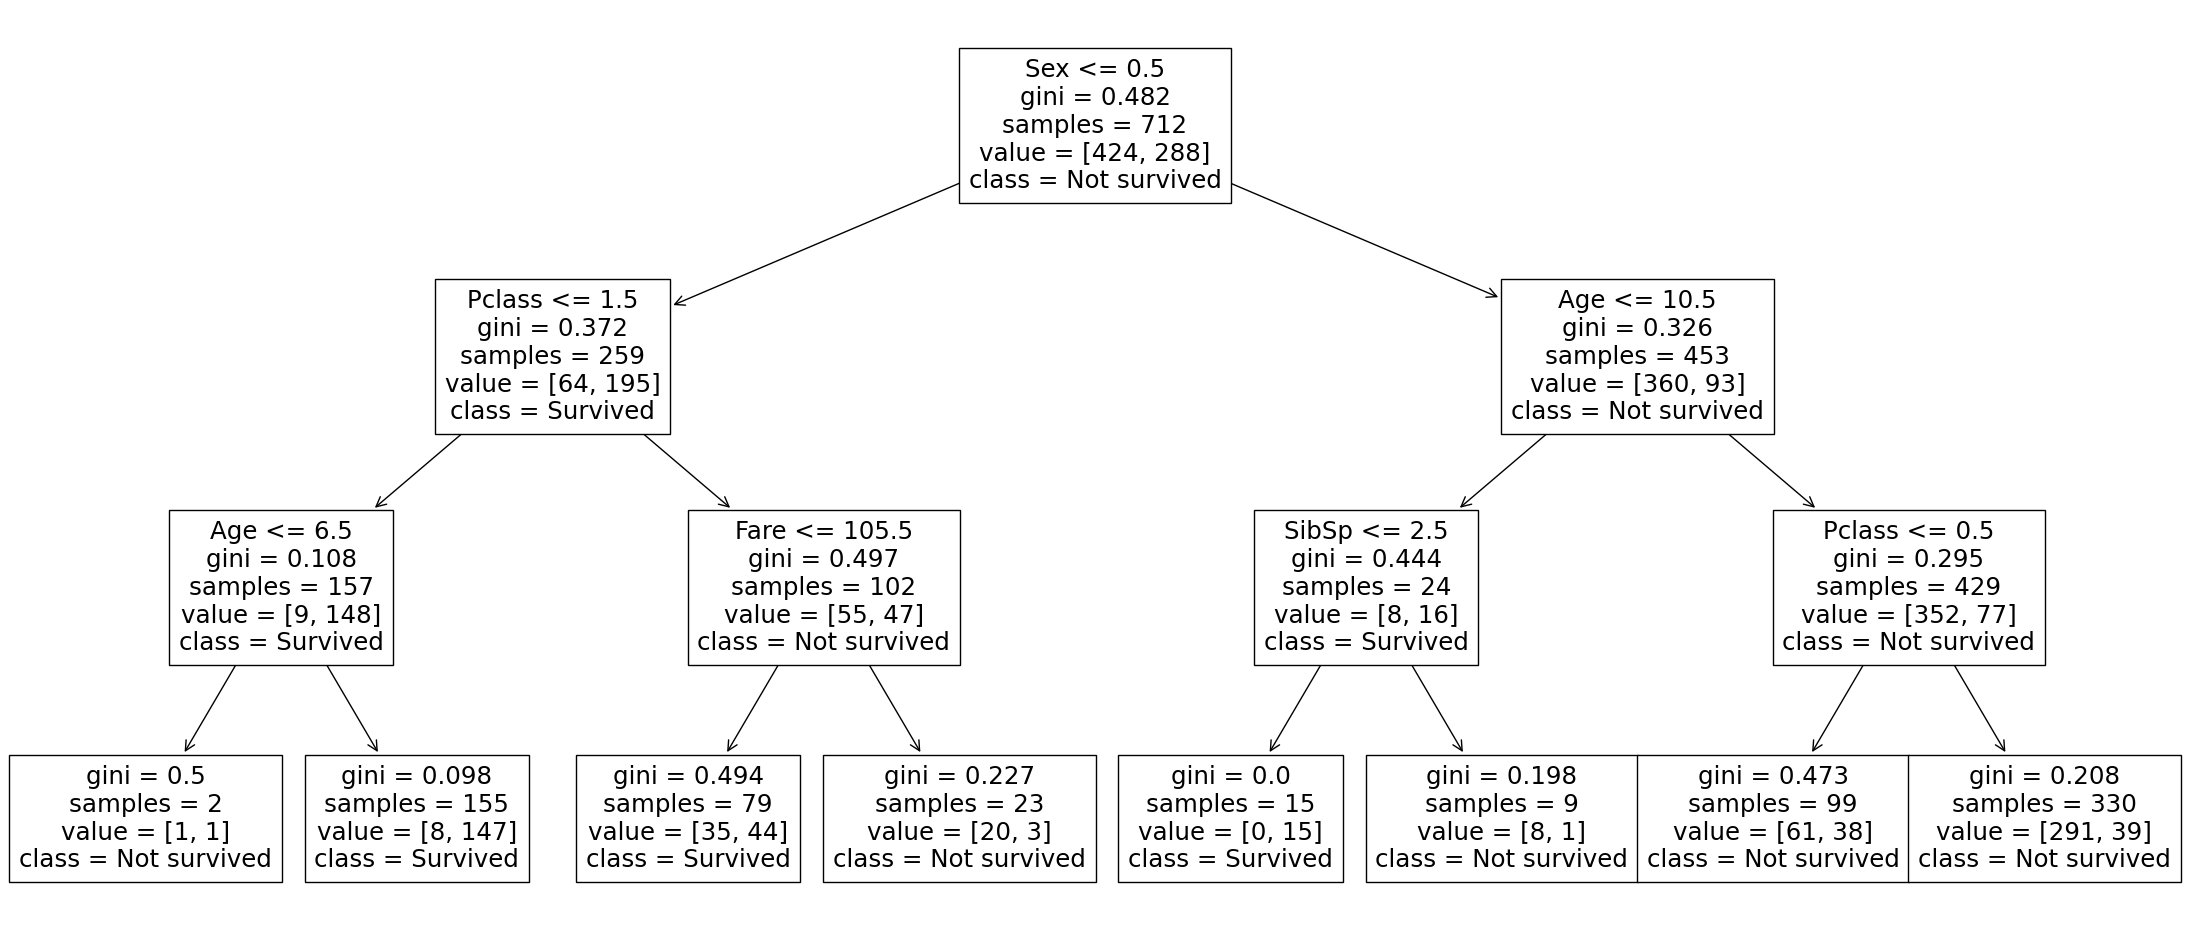

In [ ]:
# Put your code here


## Further reading/materials
* [Decision Trees' description in sklearn](https://scikit-learn.org/stable/modules/tree.html#tree)

<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60">

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'>


Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej".   
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>